In [1]:
# Importing Libs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"] = [12, 7]

In [3]:
sns.set()

In [4]:
df = pd.read_csv("../enc_devs_py_2021_fixed.csv")

In [5]:
from IPython.core.display import HTML as Center

Center(
    """ <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """
)

In [6]:
# Light
color_hombres_light = (12 / 255, 50 / 255, 196 / 255, 0.5)
color_mujeres_light = (255 / 255, 192 / 255, 203 / 255, 0.5)
color_neutro_light = (149 / 255, 165 / 255, 166 / 255, 0.5)
# Dark
color_hombres_dark = (12 / 255, 50 / 255, 196 / 255, 0.8)
color_mujeres_dark = (255 / 255, 192 / 255, 203 / 255, 0.8)
color_neutro_dark = (149 / 255, 165 / 255, 166 / 255, 0.8)

# HELPER FUNCTIONS

In [7]:
def split_row(row):
    if isinstance(row, str):
        return row.split(";")


def make_df(df, col):
    cats = {}
    for i in col.map(split_row):
        for j in i:
            cats[j] = 0
    for i in col.map(split_row):
        for j in i:
            cats[j] += 1
    df = pd.DataFrame(
        data=[i for i in cats.items()], columns=["cat", "count"]
    ).set_index("cat")
    return df

In [8]:
def show_columns():
    for i in df.columns:
        print(i)

In [9]:
show_columns()

marca_temp
modalidad
trabajo
tipo_de_trabajo
devops
programar_x_trabajo
exp_en_IT
exp_en_programacion
1_linea_de_codigo
educacion
carr_especialidades
imp_ed_formal
genero
edad_actual
salario_mensual
prog_script_leng
lib_frameworks
otras_lib_frameworks
db
plataformas
leng_fav
leng_mas_odiado
fram_fav
fram_mas_odiado
herramientas


# GENERO 
- Se exploran las posibles 'asunciones populares' relativas al genero dentro de la industria de TI. (Basado en busquedas laborales donde se especifica el genero.)

- GENERAL

In [10]:
df["genero"].shape

(342,)

In [11]:
df["genero"].isna().sum()

8

In [12]:
df["genero"].value_counts()

HOMBRE         279
MUJER           49
NO COMPARTO      6
Name: genero, dtype: int64

In [13]:
df["genero"].value_counts(normalize=True)

HOMBRE         0.835329
MUJER          0.146707
NO COMPARTO    0.017964
Name: genero, dtype: float64

<AxesSubplot: title={'center': 'GENERO'}>

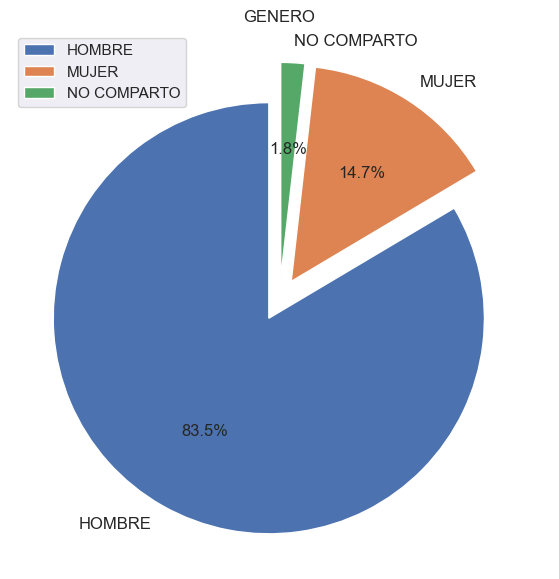

In [15]:
df["genero"].value_counts(normalize=True).plot(
    kind="pie",
    title="GENERO",
    ylabel="",
    explode=(0.1, 0.1, 0.1),
    startangle=90,
    legend=True,
     autopct="%1.1f%%",
            textprops={"fontsize": 12},
)

### GENERO POR EDADES

In [16]:
edades = [i for i in df["edad_actual"].value_counts().keys()]

edades_agrupadas = df.groupby("edad_actual")
edades

['30-34',
 '25-29',
 '35-39',
 '20-24',
 '40-44',
 '15-19',
 '45-49',
 '55-59',
 '50-54']

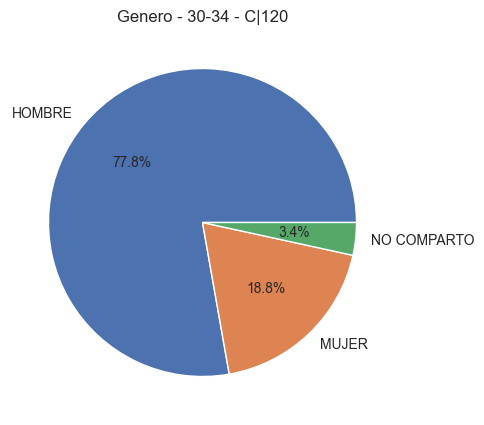

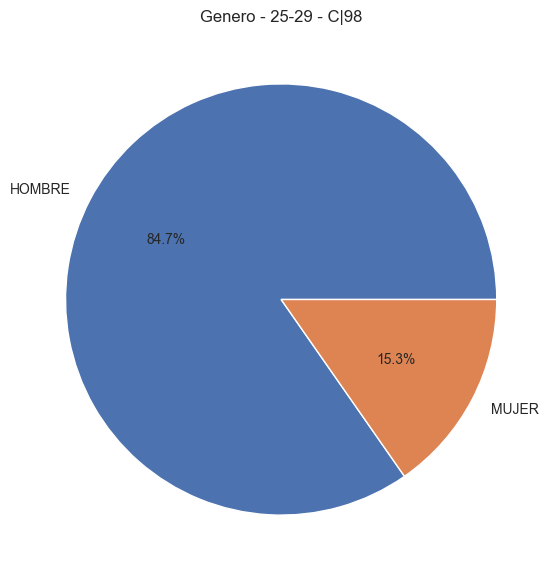

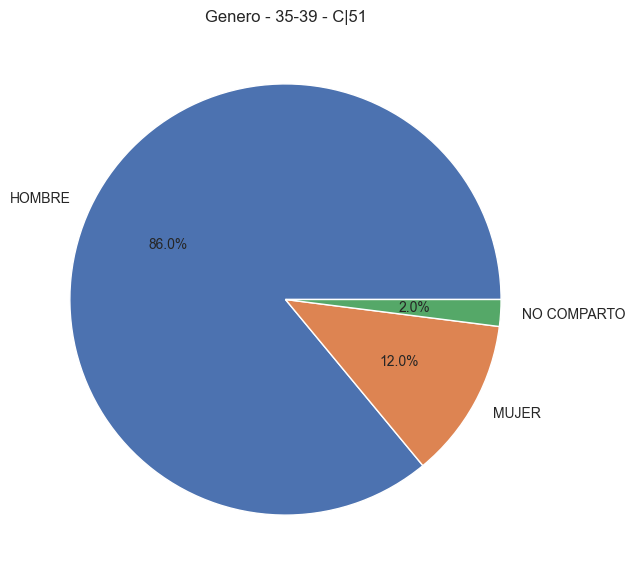

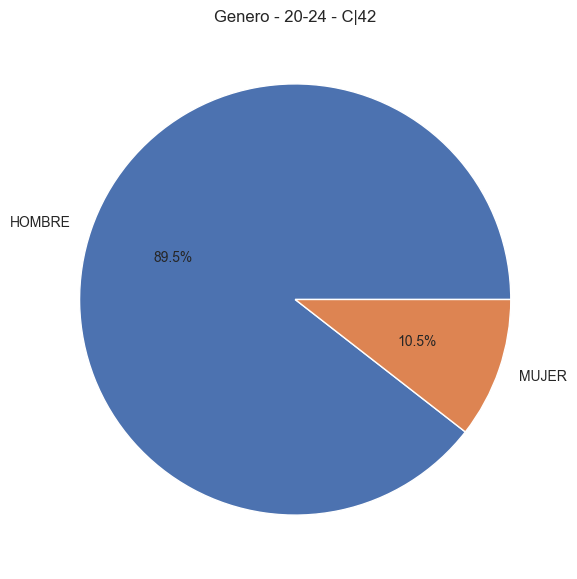

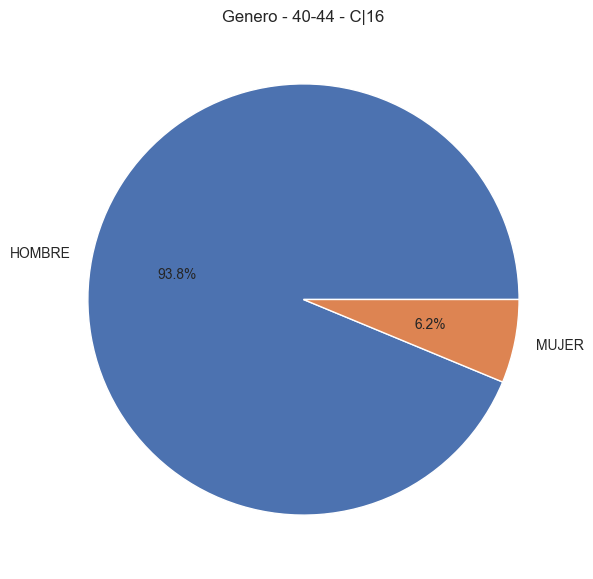

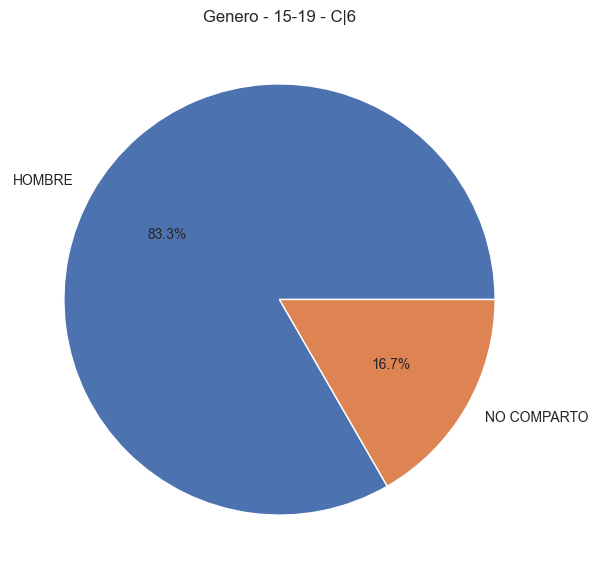

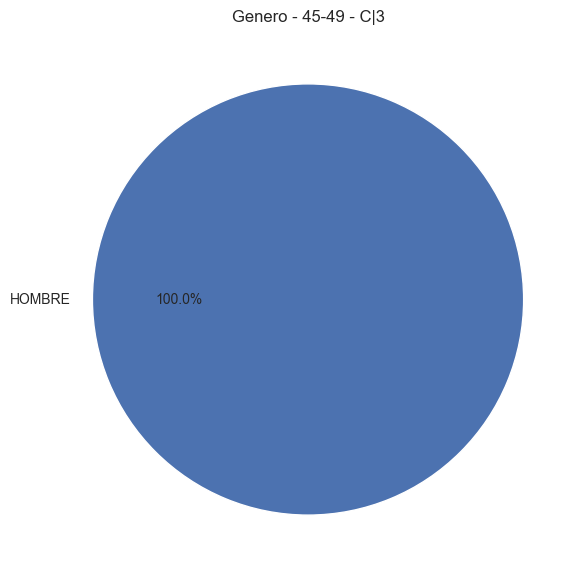

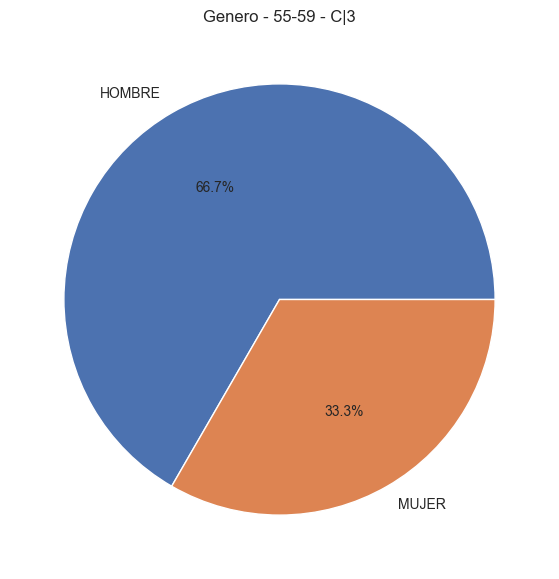

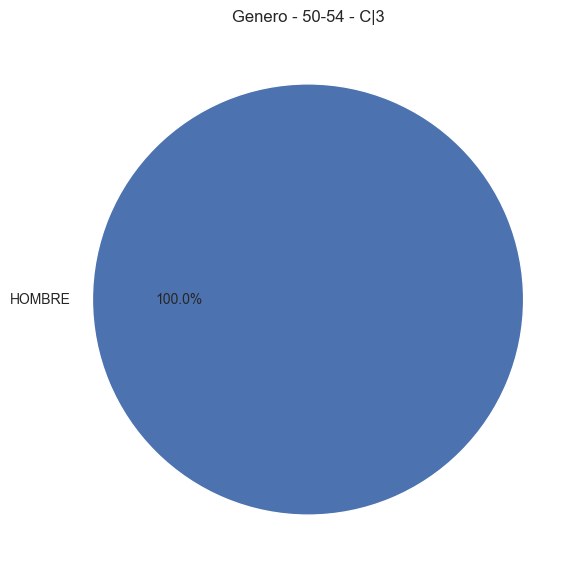

In [39]:
plt.figure(figsize=(5,5))

for k, v in enumerate(edades):
    #plt.subplot(5, 2, k + 1)

    genero_df = edades_agrupadas.get_group(v)["genero"].value_counts(normalize=True)
    genero_df.plot(
        kind="pie",
        title="Genero - {0} - C|{1}".format(
            v, edades_agrupadas.get_group(v)["genero"].shape[0]
        ),
        ylabel="",
         autopct="%1.1f%%",
            textprops={"fontsize": 10},
    )
    plt.show()


#plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

In [40]:
for k, v in enumerate(edades):
    print(
        "> Genero - {0} - C|{1} \n{2} \n==============================================\n".format(
            v,
            edades_agrupadas.get_group(v)["genero"].shape[0],
            edades_agrupadas.get_group(v)["genero"].value_counts(normalize=True),
        )
    )

> Genero - 30-34 - C|120 
HOMBRE         0.777778
MUJER          0.188034
NO COMPARTO    0.034188
Name: genero, dtype: float64 

> Genero - 25-29 - C|98 
HOMBRE    0.846939
MUJER     0.153061
Name: genero, dtype: float64 

> Genero - 35-39 - C|51 
HOMBRE         0.86
MUJER          0.12
NO COMPARTO    0.02
Name: genero, dtype: float64 

> Genero - 20-24 - C|42 
HOMBRE    0.894737
MUJER     0.105263
Name: genero, dtype: float64 

> Genero - 40-44 - C|16 
HOMBRE    0.9375
MUJER     0.0625
Name: genero, dtype: float64 

> Genero - 15-19 - C|6 
HOMBRE         0.833333
NO COMPARTO    0.166667
Name: genero, dtype: float64 

> Genero - 45-49 - C|3 
HOMBRE    1.0
Name: genero, dtype: float64 

> Genero - 55-59 - C|3 
HOMBRE    0.666667
MUJER     0.333333
Name: genero, dtype: float64 

> Genero - 50-54 - C|3 
HOMBRE    1.0
Name: genero, dtype: float64 



### GENERO POR PROFESION

In [41]:
generos = df.groupby("genero")

 #### HOMBRES vs PROFESION

In [42]:
hombres_df = generos.get_group("HOMBRE")

In [51]:
ed = None

<Figure size 900x500 with 0 Axes>

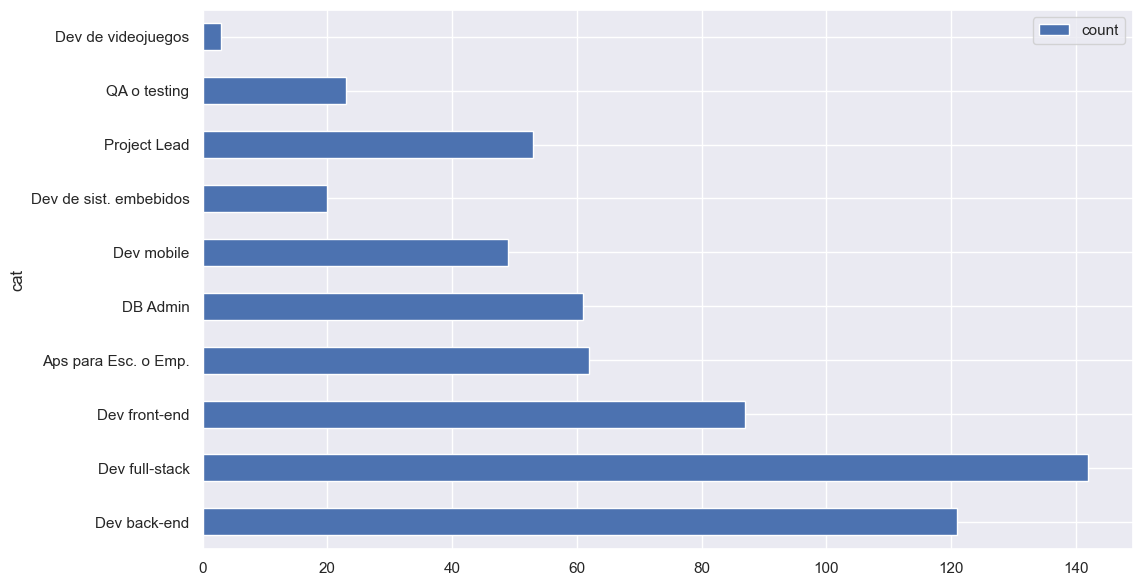

In [52]:
fig = plt.figure(figsize=(9, 5))

tipo_trabajo_df = make_df(ed, generos.get_group("HOMBRE")["tipo_de_trabajo"])


tipo_trabajo_plot = tipo_trabajo_df.plot(kind="barh")




In [53]:
tipo_trabajo_df

,count
cat,
Dev back-end,121
Dev full-stack,142
Dev front-end,87
Aps para Esc. o Emp.,62
DB Admin,61
Dev mobile,49
Dev de sist. embebidos,20
Project Lead,53
QA o testing,23


#### Mujeres

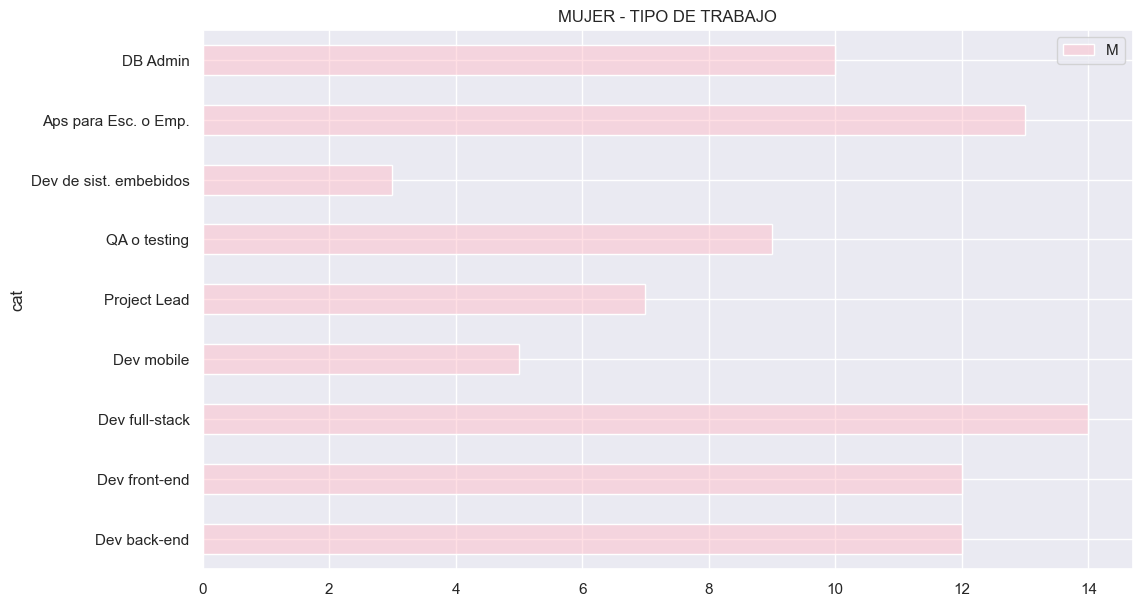

In [54]:
mujeres_df = make_df(ed, generos.get_group("MUJER")["tipo_de_trabajo"])
mujeres_df.plot(kind="barh", color=color_mujeres_light, title="MUJER - TIPO DE TRABAJO")
plt.legend(("Mujeres"))

In [55]:
mujeres_df

,count
cat,
Dev back-end,12
Dev front-end,12
Dev full-stack,14
Dev mobile,5
Project Lead,7
QA o testing,9
Dev de sist. embebidos,3
Aps para Esc. o Emp.,13
DB Admin,10


# TIPO DE TRABAJO HOMBRES VS MUJERES

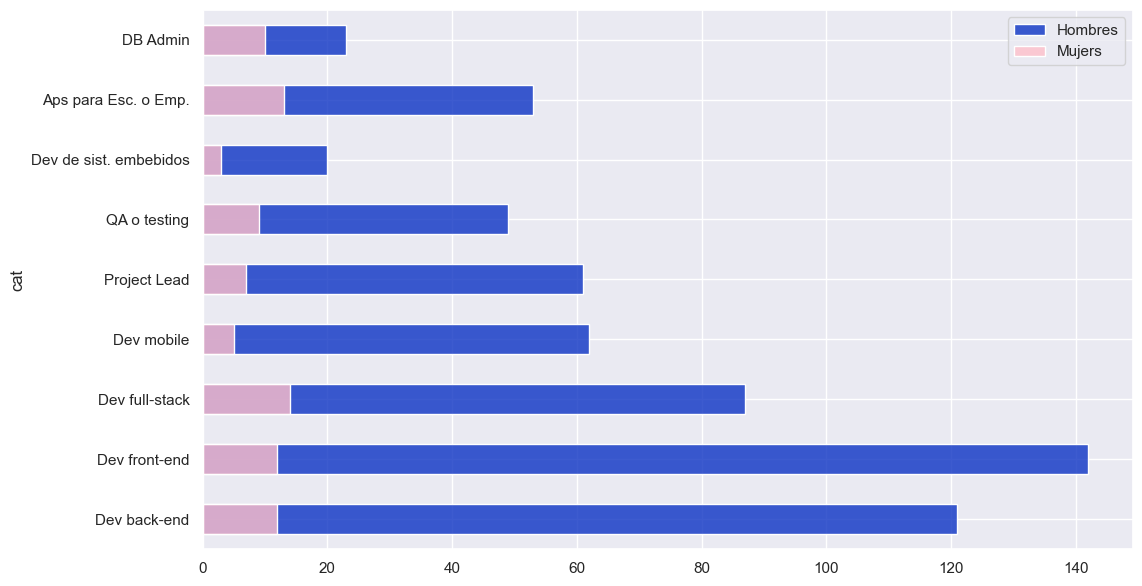

In [56]:
ax = make_df(ed, generos.get_group("HOMBRE")["tipo_de_trabajo"]).plot(
    kind="barh", color=color_hombres_dark
)


make_df(ed, generos.get_group("MUJER")["tipo_de_trabajo"]).plot(
    kind="barh", color=color_mujeres_dark, ax=ax, xlabel=""
)


plt.legend(("Hombres", "Mujers"))

# EXPERIENCIA EN TI POR GENERO

#### HOMBRES

In [60]:
df.columns

Index(['marca_temp', 'modalidad', 'trabajo', 'tipo_de_trabajo', 'devops',
       'programar_x_trabajo', 'exp_en_IT', 'exp_en_programacion',
       '1_linea_de_codigo', 'educacion', 'carr_especialidades',
       'imp_ed_formal', 'genero', 'edad_actual', 'salario_mensual',
       'prog_script_leng', 'lib_frameworks', 'otras_lib_frameworks', 'db',
       'plataformas', 'leng_fav', 'leng_mas_odiado', 'fram_fav',
       'fram_mas_odiado', 'herramientas'],
      dtype='object')

In [61]:
generos.get_group("HOMBRE")["exp_en_IT"].value_counts(normalize=True)

5-9      0.351254
<5       0.268817
10-14    0.254480
15-19    0.053763
20-24    0.032258
25-29    0.017921
30-34    0.014337
35-39    0.003584
>50      0.003584
Name: exp_en_IT, dtype: float64

<AxesSubplot: title={'center': 'EXPERIENCIA EN TI - HOMBRES'}>

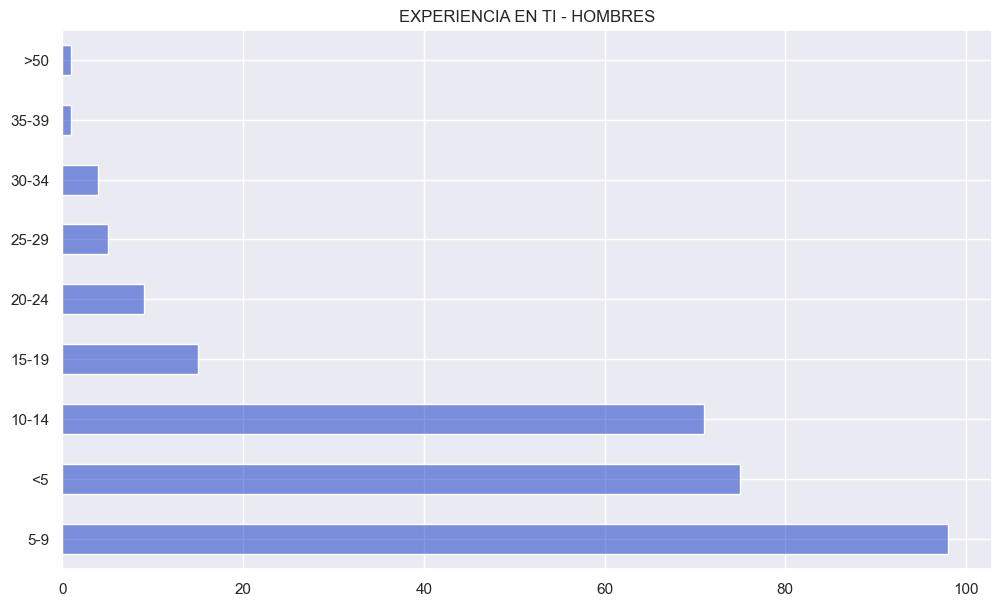

In [63]:
generos.get_group("HOMBRE")["exp_en_IT"].value_counts().plot(
    kind="barh", color=color_hombres_light, title="EXPERIENCIA EN TI - HOMBRES"
)

#### MUJERES

In [65]:
generos.get_group("MUJER")["exp_en_IT"].value_counts(normalize=True)

5-9      0.469388
<5       0.285714
10-14    0.142857
15-19    0.081633
35-39    0.020408
Name: exp_en_IT, dtype: float64

<AxesSubplot: title={'center': 'EXPERIENCIA EN TI - MUJER'}>

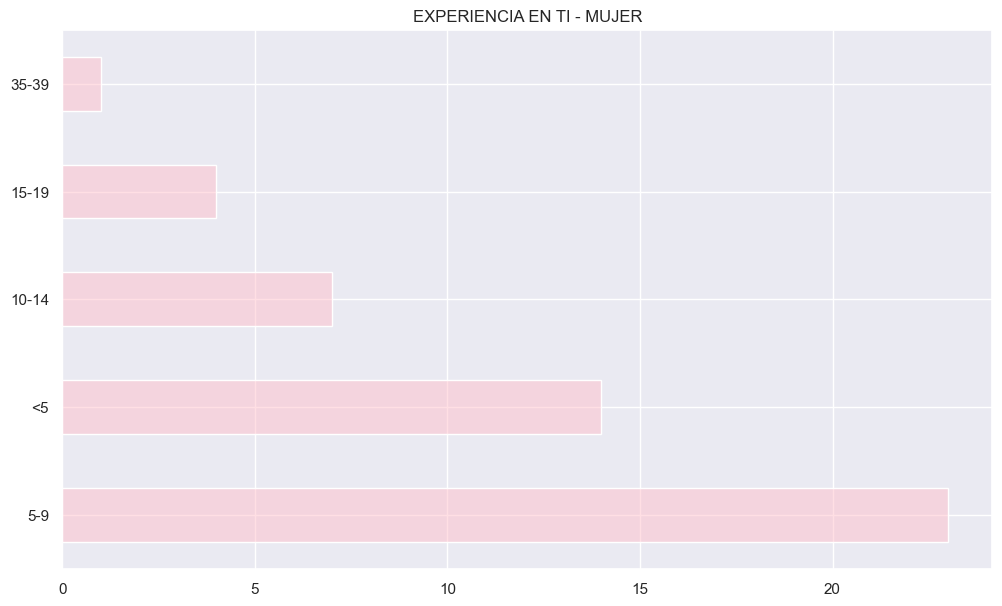

In [67]:
generos.get_group("MUJER")["exp_en_IT"].value_counts().plot(
    kind="barh", color=color_mujeres_light, title="EXPERIENCIA EN TI - MUJER"
)

### NO COMPARTO

In [69]:
generos.get_group("NO COMPARTO")["exp_en_IT"].value_counts(normalize=True)

<5       0.333333
10-14    0.333333
5-9      0.166667
45-49    0.166667
Name: exp_en_IT, dtype: float64

<AxesSubplot: title={'center': 'EXPERIENCIA EN TI - NO COMPARTO'}>

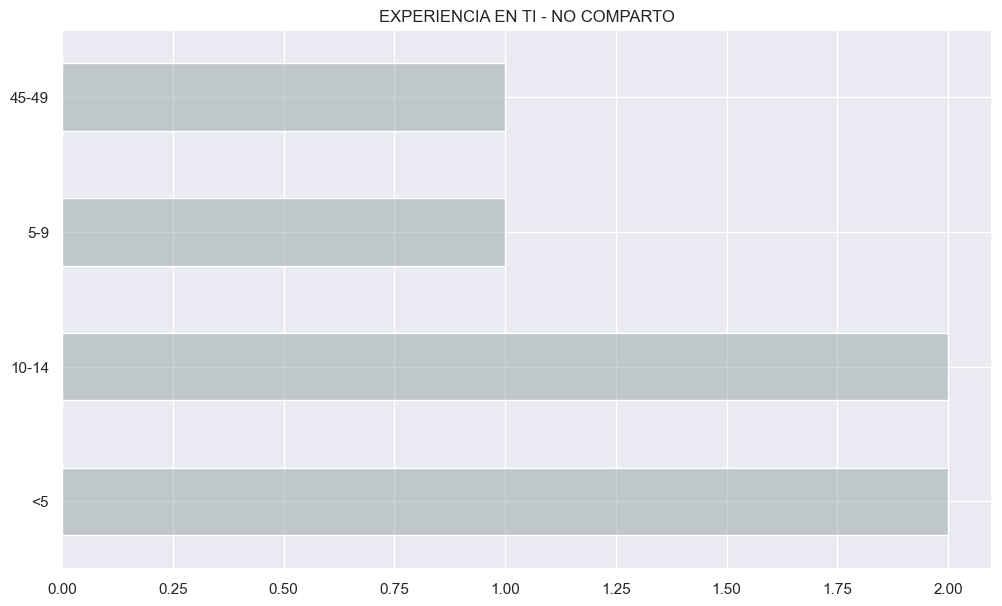

In [71]:
generos.get_group("NO COMPARTO")["exp_en_IT"].value_counts().plot(
    kind="barh", color=color_neutro_light, title="EXPERIENCIA EN TI - NO COMPARTO"
)

### EDAD ACTUAL POR GENERO

- HOMBRES

In [73]:
generos.get_group("HOMBRE")["edad_actual"].value_counts(normalize=True)

30-34    0.326165
25-29    0.297491
35-39    0.154122
20-24    0.121864
40-44    0.053763
15-19    0.017921
45-49    0.010753
50-54    0.010753
55-59    0.007168
Name: edad_actual, dtype: float64

<AxesSubplot: title={'center': 'EDAD ACTUAL - HOMBRES'}>

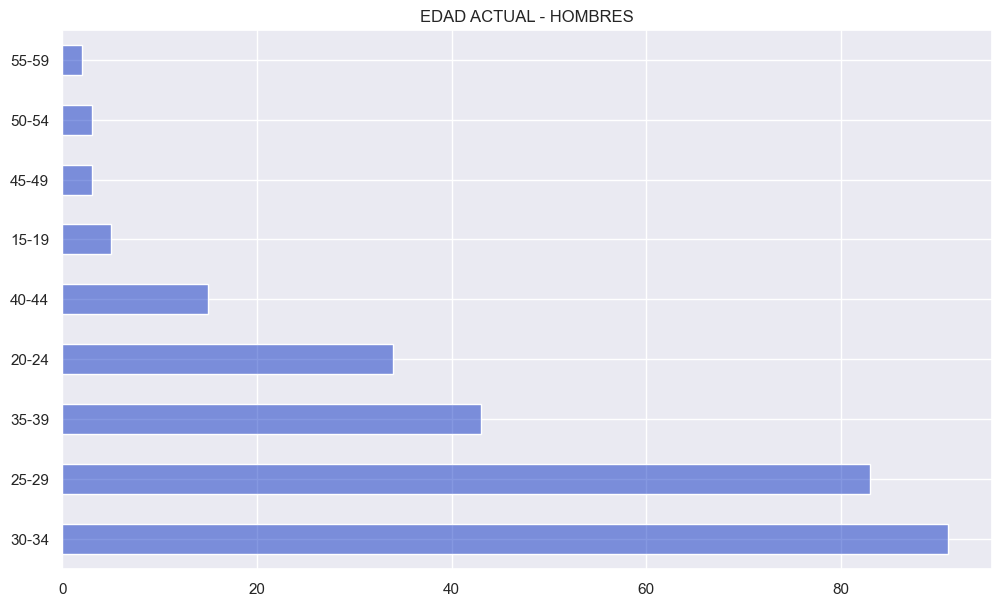

In [74]:
generos.get_group("HOMBRE")["edad_actual"].value_counts().plot(
    kind="barh", title="EDAD ACTUAL - HOMBRES", color=color_hombres_light
)

- MUJERES

In [75]:
generos.get_group("MUJER")["edad_actual"].value_counts(normalize=True)

30-34    0.448980
25-29    0.306122
35-39    0.122449
20-24    0.081633
55-59    0.020408
40-44    0.020408
Name: edad_actual, dtype: float64

<AxesSubplot: title={'center': 'EDAD ACTUAL - MUJER'}>

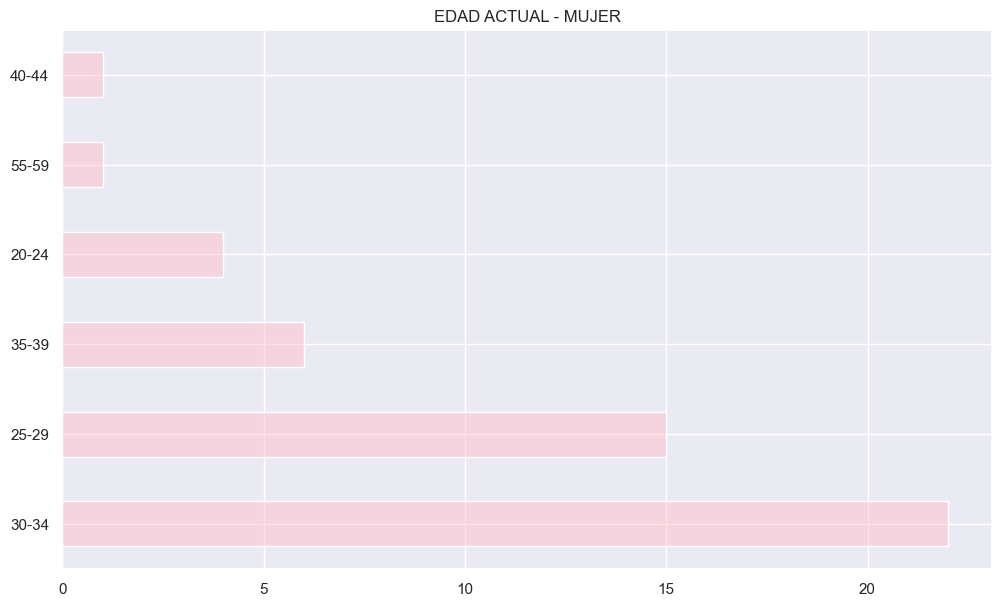

In [76]:
generos.get_group("MUJER")["edad_actual"].value_counts().plot(
    kind="barh", title="EDAD ACTUAL - MUJER", color=color_mujeres_light
)

- NO DEFINIDO

In [77]:
generos.get_group("NO COMPARTO")["edad_actual"].value_counts(normalize=True)

30-34    0.666667
35-39    0.166667
15-19    0.166667
Name: edad_actual, dtype: float64

<AxesSubplot: title={'center': 'EDAD ACTUAL - NO COMPARTO'}>

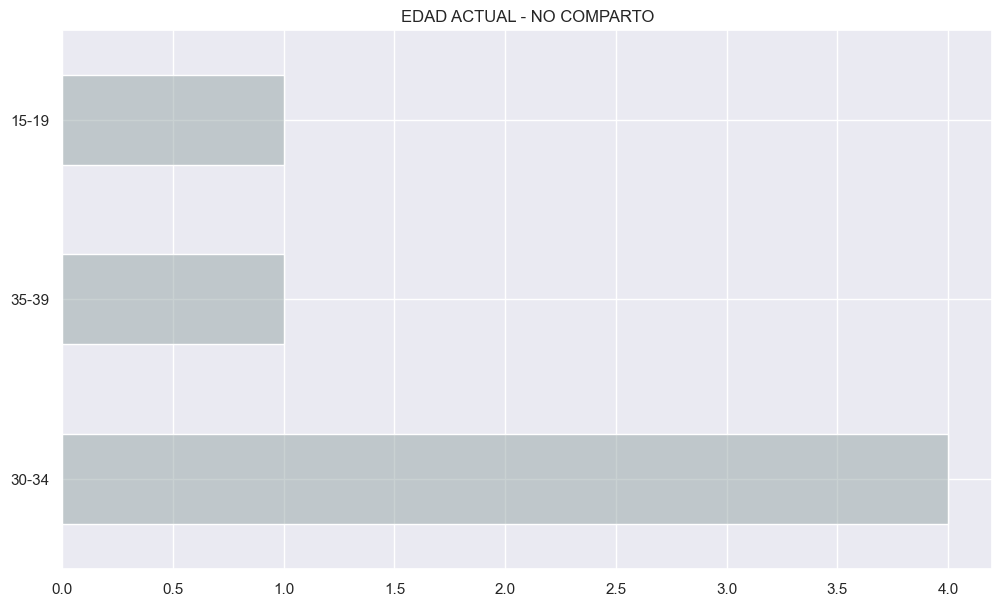

In [78]:
generos.get_group("NO COMPARTO")["edad_actual"].value_counts().plot(
    kind="barh", title="EDAD ACTUAL - NO COMPARTO", color=color_neutro_light
)

In [79]:
show_columns()

marca_temp
modalidad
trabajo
tipo_de_trabajo
devops
programar_x_trabajo
exp_en_IT
exp_en_programacion
1_linea_de_codigo
educacion
carr_especialidades
imp_ed_formal
genero
edad_actual
salario_mensual
prog_script_leng
lib_frameworks
otras_lib_frameworks
db
plataformas
leng_fav
leng_mas_odiado
fram_fav
fram_mas_odiado
herramientas
